# Introduction
This experiment focuses on learning the $xy$ function using a simple KAN model. This will later on be used as a symbolic activation function itself to prove the concept of "extendible" symbolic activation functions and to show that having such an activation function can indeed help the training process in having faster and more accurate  convergence. The $xy$ function is defined as follows:
$$ xy(x) = x_0 * x_1 $$
where $x = [x_0, x_1]$

In [1]:
import matplotlib.pyplot as plt
import torch.cuda

from kan import KAN, create_dataset

# Let's set the device to be used for the dataset generation
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device = 'cpu'

def xy(x):
    return x[:, [0]] * x[:, [1]]

Let's create an extensive dataset for the $xy$ function.

In [2]:
dataset = create_dataset(
    f=xy,
    n_var=2,
    train_num=10000,
    test_num=1000,
    device=device,
    ranges=[(-10, 10), (-10, 10)]
)

Let's take a look at the dataset through a scatter plot.

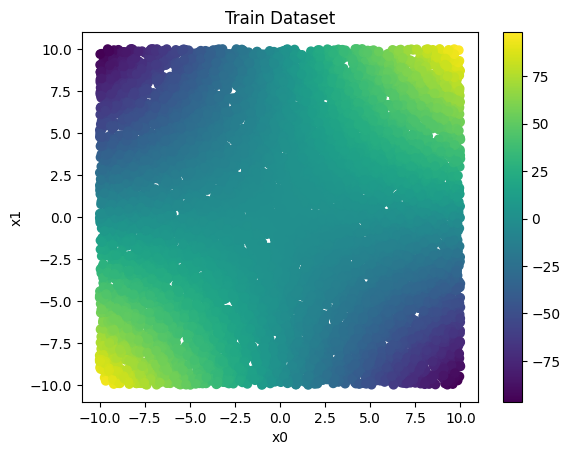

In [3]:
plt.scatter(dataset['train_input'][:, [0]].to('cpu'), dataset['train_input'][:, [1]].to('cpu'),
            c=dataset['train_label'].flatten().to('cpu'), cmap='viridis')
plt.title('Train Dataset')
plt.xlabel('x0')
plt.ylabel('x1')
plt.colorbar()
plt.show()

Let's create a simple KAN model to learn the `xy` function. Simple application of KA theorem give us that the target function can be represented as follows
$$ 
xy(x) = \dfrac{1}{2}\left( \left(x_0 + x_1\right)^2 - x_0^2 - x_1^2 \right)
$$
So a simple `[2, 3, 3, 1]` KAN model should be able to learn this function.

In [4]:
model = KAN(width=[2, 3, 3, 1], grid=100, k=3, device=device)

Since we know its explicit form, we can use it to initialize the model.

r2 is 0.7779091596603394
r2 is not very high, please double check if you are choosing the correct symbolic function.
r2 is 0.7826252579689026
r2 is not very high, please double check if you are choosing the correct symbolic function.
r2 is 0.9846869111061096
r2 is 0.9848194122314453
Best value at boundary.
r2 is 0.9986667633056641
r2 is 0.9976706504821777
Best value at boundary.
r2 is 0.9954747557640076
r2 is 0.9994252920150757
r2 is 0.9984908103942871
r2 is 0.9984245896339417


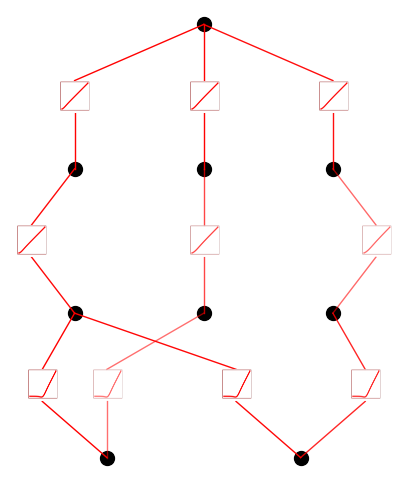

In [5]:
model(dataset['train_input'])
model.fix_symbolic(0, 0, 0, 'x')
model.fix_symbolic(0, 1, 0, 'x')
model.fix_symbolic(0, 0, 1, 'x^2')
model.remove_edge(0, 1, 1)
model.remove_edge(0, 0, 2)
model.fix_symbolic(0, 1, 2, 'x^2')
model.fix_symbolic(1, 0, 0, 'x^2')
model.remove_edge(1, 1, 0)
model.remove_edge(1, 2, 0)
model.remove_edge(1, 0, 1)
model.fix_symbolic(1, 1, 1, 'x')
model.remove_edge(1, 2, 1)
model.remove_edge(1, 0, 2)
model.remove_edge(1, 1, 2)
model.fix_symbolic(1, 2, 2, 'x')
model.fix_symbolic(2, 0, 0, 'x')
model.fix_symbolic(2, 1, 0, 'x')
model.fix_symbolic(2, 2, 0, 'x')
model.plot()

In [6]:
losses = model.fit(dataset=dataset, opt='LBFGS', steps=20)

train loss: 1.27e-05 | test loss: 1.27e-05 | reg: 2.38e+01 : 100%|██| 20/20 [00:24<00:00,  1.20s/it]


After some simple training, we finally have (quite) machine precision accuracy.

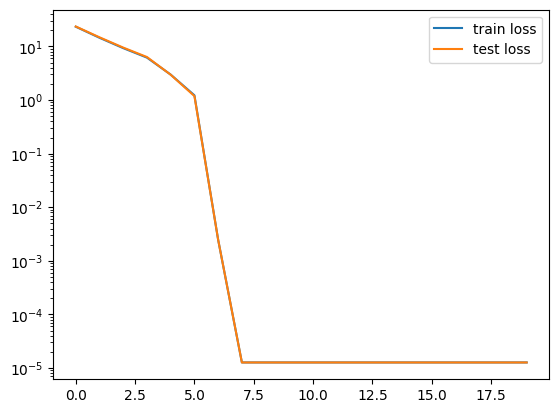

In [7]:
plt.plot(losses['train_loss'], label='train loss')
plt.plot(losses['test_loss'], label='test loss')
plt.legend()
plt.yscale('log')
plt.show()

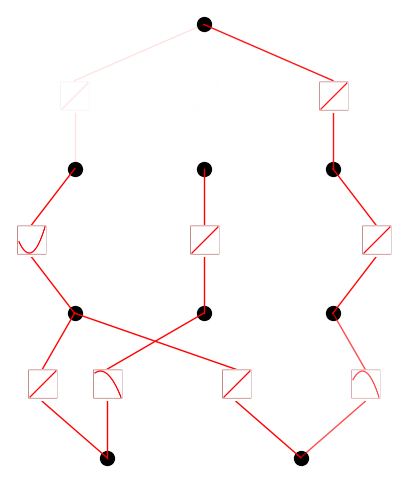

In [8]:
model.plot()

In [9]:
model.symbolic_formula()

make sure all activations need to be converted to symbolic formulas first!
